<img src="https://farm66.staticflickr.com/65535/49055715328_092031af74_o.png"  width="150" />

### CBPF - Centro Brasileiro de Pesquisas Físicas

# Aula 2 - Professor: Clécio R Debom


# Legacy: Accessing Catalog


This notebook will illustrate the basics of accessing the Table Catalogs (fits format), which contains the basic properties of dataset Legacy. credit: Luciana O. Dias.

**Contact:** debom@cbpf.br</font>
/
<a href="www.clearnightsrthebest.com">clearnightsrthebest.com</a>

<font size="2">

Please do not remove this disclaimer.</font>

# Pre-requirements

Download the file catalog from page https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=0 

In [1]:
!wget -O legacy_dr8_class.fits "https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=1"
!ls

--2021-11-02 20:48:25--  https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:601d:18::a27d:512, 162.125.5.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:601d:18::a27d:512|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/pkiccdls9k2jrkz/legacy_dr8_class.fits [following]
--2021-11-02 20:48:26--  https://www.dropbox.com/s/dl/pkiccdls9k2jrkz/legacy_dr8_class.fits
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3191797f3f83c892914264233e.dl.dropboxusercontent.com/cd/0/get/BZOV6_l4qMfrNANdgVMUkpQ8E6UOPcq4Ko8qobo8t1s6yixtNgrYaEl3MpI2MkagiL6DFrw_JXWPN2pNw6-7jI9ZVIXbHRXrV7cdAEe1RLR0msvzMBV2K1jaDN5VNCmaHWf-vDu2Fsryq3W-KvP_CgBB/file?dl=1# [following]
--2021-11-02 20:48:26--  https://uc3191797f3f83c892914264233e.dl.dropboxusercontent.com/cd/0/get/BZOV6_l4qMfrNANdgVMUkpQ8E6UOPcq4Ko8qobo8t1s6y

## Import necessary packages

In [2]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn


# Open catalog from fits table using astropy package

In [3]:
hdul = fits.open("legacy_dr8_class.fits", ignore_missing_end=True) 
data = hdul[1].data # table extensions can't be the first extension, so there's a dummy image extension at 0
cat_table = Table(data)
cols=cat_table.columns
# print(data)
print(cols)

<TableColumns names=('ra','dec','MAG_R','MAG_G','MAG_Z','MAG_W1','MAG_W2','MAG_W3','MAG_W4','MAGErr_R','MAGErr_G','MAGErr_Z','MAGErr_W1','MAGErr_W2','MAGErr_W3','MAGErr_W4','z','zErr','zmin','zmax','z_spec','training')>


# Constructing Pandas DataFrame from Table fits

In [4]:
df = cat_table.to_pandas()
print(df)

                ra        dec      MAG_R      MAG_G      MAG_Z     MAG_W1  \
0       219.082895  34.625036  22.280201  23.840595  20.669277  19.442677   
1       219.018687  34.625374  20.950979  22.239498  20.180450  19.764698   
2       218.976383  34.626466  18.890739  20.205397  18.109526  18.055065   
3       218.924620  34.625596  20.606371  21.781631  19.691599  19.006557   
4       219.104225  34.625848  20.372391  21.050526  20.042389  20.373194   
...            ...        ...        ...        ...        ...        ...   
203479  221.384627  35.031304  20.289848  22.006527  19.473064  18.800829   
203480  221.267106  35.032654  22.278854  24.686527  21.332008  20.327465   
203481  221.357931  35.031956  21.256090  22.794085  20.244637  18.834969   
203482  221.140035  35.031835  20.928772  22.810913  19.648155  18.766457   
203483  221.306115  35.032601  22.024387  23.518301  20.663643  19.733841   

           MAG_W2     MAG_W3     MAG_W4  MAGErr_R  ...  MAGErr_W1  MAGErr_W

# Fit mag R, G, Z, W1, W2, W3 e W4 using dataframe plot histogram






<function matplotlib.pyplot.show(*args, **kw)>

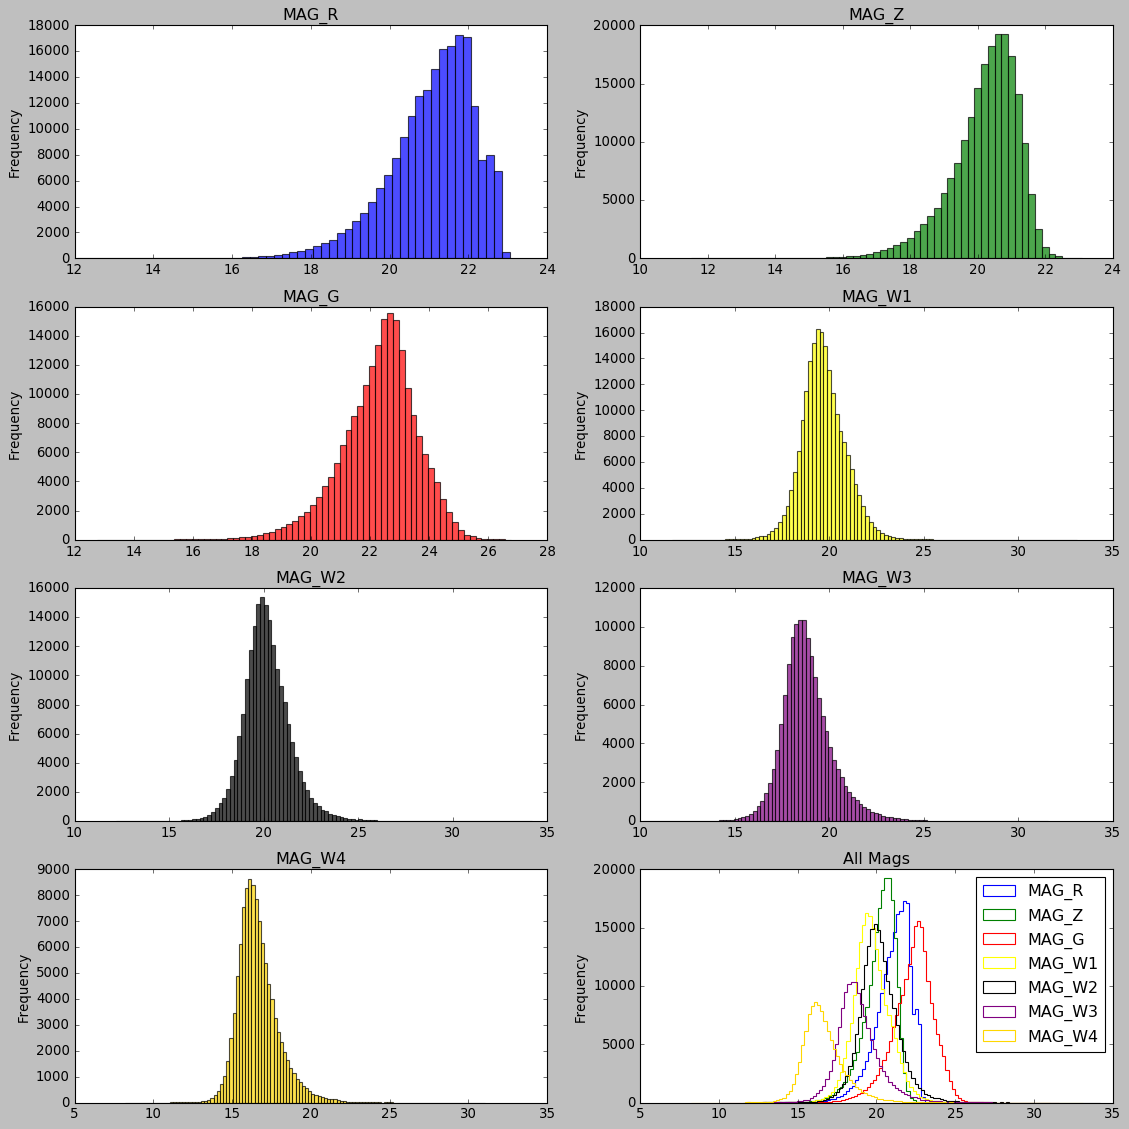

In [5]:
data = cat_table
### MAG PLOTS
BANDS = ["R","Z", "G", "W1", "W2", "W3", "W4"]
mags = ['MAG_'+band for band in BANDS]
key_list = mags 
color_list = ['blue', 'green', 'red', 'yellow', 'black', "purple", "gold"]
hor = 2
ver = 4

plt.style.use('classic')

fig = plt.figure(figsize=(14, 14), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.05, right=0.5, wspace=0.05)

i=0
binsize=0.2
def binarange(arr, binsize):
    return np.arange(np.nanmin(arr), np.nanmax(arr)+binsize, binsize)


for v in range(ver):
    for h in range(hor):
        if v==(ver-1):
            ax = fig.add_subplot(gs[v, 0])
            bins = binarange(data.field(key_list[i]), binsize)
            ax = df[key_list[i]].plot.hist(bins=bins, color=color_list[i], alpha=0.7)
            ax.set_title(key_list[i])
            
            ax = fig.add_subplot(gs[v, 1])
            for c, key in enumerate(key_list):
                bins = binarange(data.field(key), binsize)
                ax = df[key].plot.hist(bins=bins, color=color_list[c], alpha=1, label=key, histtype='step')
            ax.set_title("All Mags")
            plt.legend()
            
            break
            i+=1
            
        
        
        mags = ['MAG_'+band for band in BANDS]
        
        ax = fig.add_subplot(gs[v, h])
        bins = binarange(data.field(key_list[i]), binsize)
        ax = df[key_list[i]].plot.hist(bins=bins, color=color_list[i], alpha=0.7)
        ax.set_title(key_list[i])
        i+=1

plt.show

# Select Pandas Dataframe mag_g < 22 

In [6]:
rslt_df = df[df['MAG_G'] < 22]
print(rslt_df)

                ra        dec      MAG_R      MAG_G      MAG_Z     MAG_W1  \
2       218.976383  34.626466  18.890739  20.205397  18.109526  18.055065   
3       218.924620  34.625596  20.606371  21.781631  19.691599  19.006557   
4       219.104225  34.625848  20.372391  21.050526  20.042389  20.373194   
9       218.854058  34.629541  20.439299  21.747459  19.725077  19.612200   
14      219.119427  34.632669  17.951214  18.725872  17.421986  17.605015   
...            ...        ...        ...        ...        ...        ...   
203456  221.320375  35.019494  20.778296  21.666706  20.231789  20.391850   
203457  221.314180  35.020159  19.881739  20.459455  19.522923  20.016617   
203461  221.138374  35.021188  20.347160  20.776453  20.086678  20.752996   
203464  221.325672  35.022265  20.660891  21.771286  19.916258  19.032324   
203468  221.372059  35.024040  20.499336  21.271202  20.050690  20.139725   

           MAG_W2     MAG_W3     MAG_W4  MAGErr_R  ...  MAGErr_W1  MAGErr_W

# Mounting your google drive

To mount your google drive:
click in showed link and set your account google get token 

# Saving New Catalog with Pandas Dataframe in csv 


(Google Drive)

In [7]:
rslt_df.to_csv('./LegacyCatalog.csv', index=False)


# Loading New Catalog with Pandas Dataframe in csv 

In [8]:
rslt_df = pd.read_csv('./LegacyCatalog.csv') 


# Calculating the signal to noise ratio

In [9]:
SNR = 1 / rslt_df["MAGErr_G"].values
Isnr = np.where(SNR > 5)
print(len(Isnr))
print(len(SNR))
print(rslt_df["MAGErr_G"].values)
print(SNR)

1
72487
[0.01148254 0.04327033 0.02521365 ... 0.02133251 0.03973555 0.03121092]
[87.08873418 23.11052154 39.66105154 ... 46.87680546 25.16638238
 32.04006819]


# Fitting with Seaborn diagram color r-i (axis x) and g-r (axis y) 


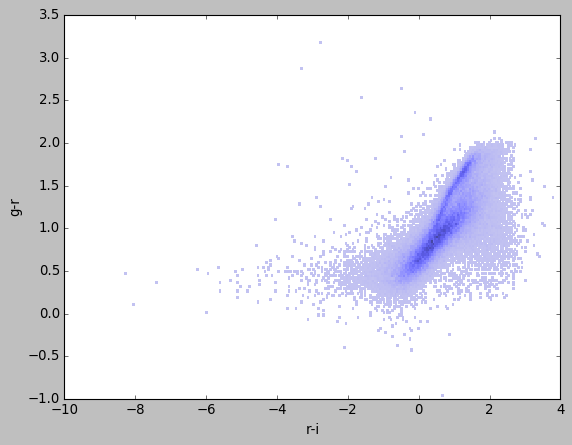

In [10]:
x = rslt_df["MAG_R"].values - rslt_df["MAG_W1"].values
y = rslt_df["MAG_G"].values - rslt_df["MAG_R"].values

d = {'r-i': x, 'g-r': y} # dictionary 
dfplot = pd.DataFrame(data=d) # dictionary to dataframe
# print(dfplot)
# seaborn.scatterplot(data=dfplot, x="r-i", y="g-r")
seaborn.histplot(data=dfplot, x="r-i", y="g-r")

# Plot with seaborn a histogram of the redshifts and save in your google drive

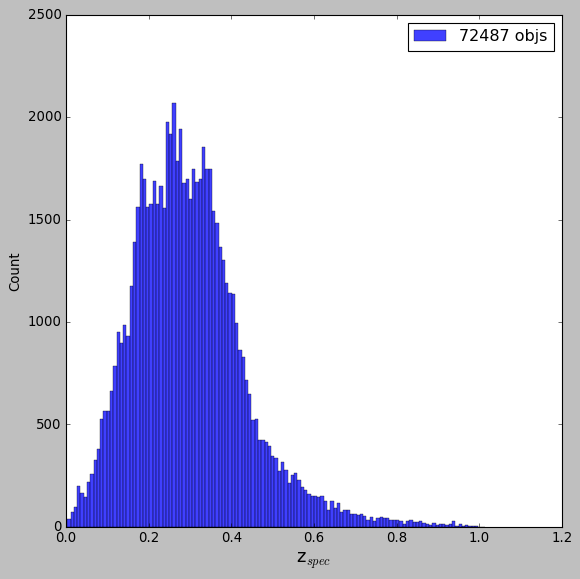

In [11]:
fig = plt.figure(figsize=(8,8))
ax = seaborn.histplot(data=rslt_df, x="z", label=str(rslt_df.shape[0]) + ' objs')
ax.set_xlabel('z$_{spec}$', fontsize=16)
ax.set_ylabel('Count')
plt.legend()
plt.savefig('./PlotZ_Legacy.png')


# Exercício 1: Adicionar uma coluna cor no arquivo fits e salvar

In [12]:
orig_table = hdul[1].data
orig_cols = orig_table.columns

In [13]:
color_array = cat_table["MAG_R"]-cat_table["MAG_G"]

In [14]:
new_cols = fits.ColDefs([fits.Column(name='COLOR RG', format='D', array=color_array)])

In [15]:
hdu = fits.BinTableHDU.from_columns(orig_cols + new_cols)

In [16]:
hdul[1].data=hdu.data

In [18]:
#hdul.writeto('newtable.fits')

In [19]:
new_hdul = fits.open("newtable.fits", ignore_missing_end=True) 
new_data = new_hdul[1].data # table extensions can't be the first extension, so there's a dummy image extension at 0
new_cat_table = Table(new_data)
new_cols=new_cat_table.columns
# print(data)
print(new_cols)

<TableColumns names=('ra','dec','MAG_R','MAG_G','MAG_Z','MAG_W1','MAG_W2','MAG_W3','MAG_W4','MAGErr_R','MAGErr_G','MAGErr_Z','MAGErr_W1','MAGErr_W2','MAGErr_W3','MAGErr_W4','z','zErr','zmin','zmax','z_spec','training','COLOR RG')>


In [20]:
new_cat_table["COLOR RG"]

-1.560394287109375
-1.2885189056396484
-1.314657211303711
-1.1752605438232422
-0.6781349182128906
-1.0098438262939453
-2.1788997650146484
-1.6666717529296875
-1.0451297760009766
...
-1.747171401977539
